# **Análisis Exploratorio de Datos**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Conectarse con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Carga de datos
df = pd.read_csv('//content/datos_proyecto.csv', sep=';')

In [ ]:
# Exploración inicial
df.head()

,Mes,Cliente,CategoriaMarca,SKU,VtaTon,VtaValor,Departamento,Poblacion,TipologiaCliente,DiaAtencion,CentroDespacho,OficinVentas
0,202401,3001295,CM5,Q1060,0.00720,62657.16,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
1,202401,3001295,CM27,M1083,0.00960,55371.36,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
2,202401,3001302,CM6,Q393,0.00132,13114.32,BOGOTÁ,BOGOTÁ D.C.,T16,MI,6038,6030
3,202401,3001306,CM6,Q916,0.01920,194285.76,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030
4,202401,3001306,CM8,Q1280,0.00050,13035.75,BOGOTÁ,BOGOTÁ D.C.,T16,LU,6038,6030


In [15]:
# Información básica del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181418 entries, 0 to 1181417
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Mes               1181418 non-null  int64  
 1   Cliente           1181418 non-null  int64  
 2   CategoriaMarca    1181418 non-null  object 
 3   SKU               1181418 non-null  object 
 4   VtaTon            1181418 non-null  float64
 5   VtaValor          1181418 non-null  float64
 6   Departamento      1181417 non-null  object 
 7   Poblacion         1181417 non-null  object 
 8   TipologiaCliente  1181417 non-null  object 
 9   DiaAtencion       1181417 non-null  object 
 10  CentroDespacho    1181417 non-null  float64
 11  OficinVentas      1181417 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 108.2+ MB
None


In [16]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())


Resumen estadístico de las variables numéricas:
                Mes       Cliente        VtaTon      VtaValor  CentroDespacho  \
count  1.181418e+06  1.181418e+06  1.181418e+06  1.181418e+06    1.181417e+06   
mean   2.024040e+05  3.027767e+06  3.081699e-02  1.795722e+05    6.035502e+03   
std    1.934670e+00  1.546137e+04  3.142377e-01  1.310673e+06    3.014253e+00   
min    2.024010e+05  3.001295e+06 -2.000000e+00 -8.957606e+06    6.001000e+03   
25%    2.024020e+05  3.012999e+06  1.380000e-03  1.735713e+04    6.033000e+03   
50%    2.024040e+05  3.030500e+06  4.600000e-03  4.330296e+04    6.038000e+03   
75%    2.024060e+05  3.043582e+06  1.600000e-02  1.178667e+05    6.038000e+03   
max    2.024070e+05  3.072785e+06  8.609400e+01  2.623801e+08    6.039000e+03   

       OficinVentas  
count  1.181417e+06  
mean   6.031128e+03  
std    1.430690e+00  
min    6.030000e+03  
25%    6.030000e+03  
50%    6.030000e+03  
75%    6.032000e+03  
max    6.034000e+03  


In [17]:
# Comprobar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
Mes                 0
Cliente             0
CategoriaMarca      0
SKU                 0
VtaTon              0
VtaValor            0
Departamento        1
Poblacion           1
TipologiaCliente    1
DiaAtencion         1
CentroDespacho      1
OficinVentas        1
dtype: int64


In [18]:
# Comprobar los datos únicos en cada columna categórica
print("\nValores únicos por columna categórica:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()}")


Valores únicos por columna categórica:
CategoriaMarca: 21
SKU: 224
Departamento: 27
Poblacion: 484
TipologiaCliente: 8
DiaAtencion: 6



Distribución de las variables numéricas:


array([[<Axes: title={'center': 'Mes'}>,
        <Axes: title={'center': 'Cliente'}>],
       [<Axes: title={'center': 'VtaTon'}>,
        <Axes: title={'center': 'VtaValor'}>],
       [<Axes: title={'center': 'CentroDespacho'}>,
        <Axes: title={'center': 'OficinVentas'}>]], dtype=object)

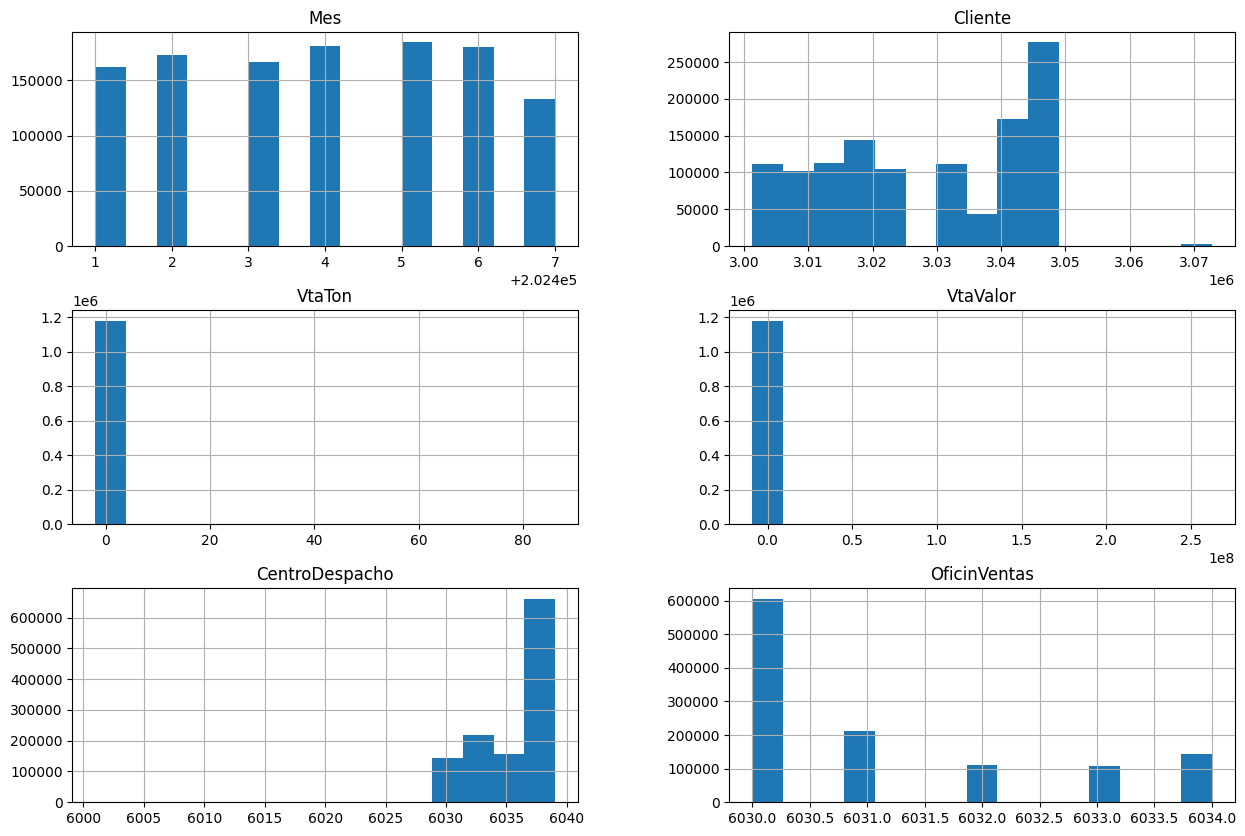

In [19]:
# Distribución de las variables numéricas
print("\nDistribución de las variables numéricas:")
df.hist(bins=15, figsize=(15, 10))

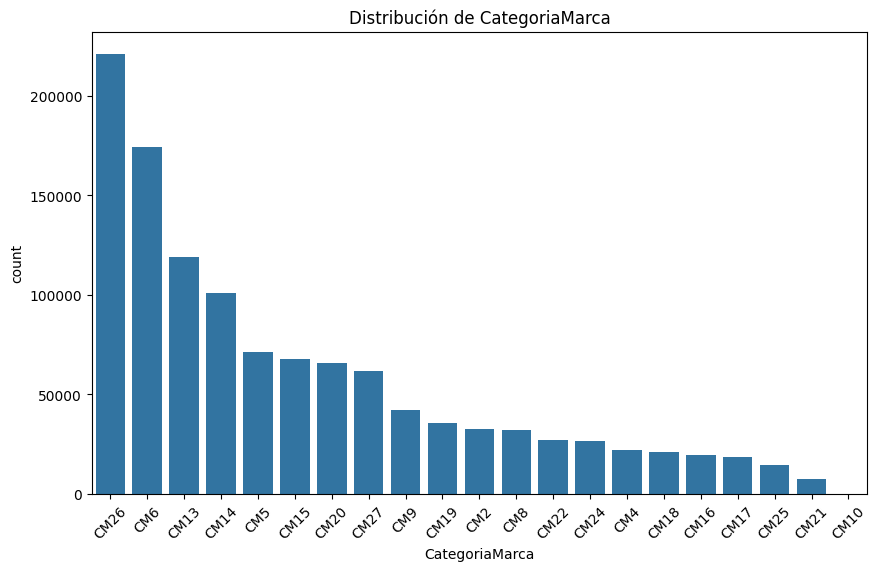

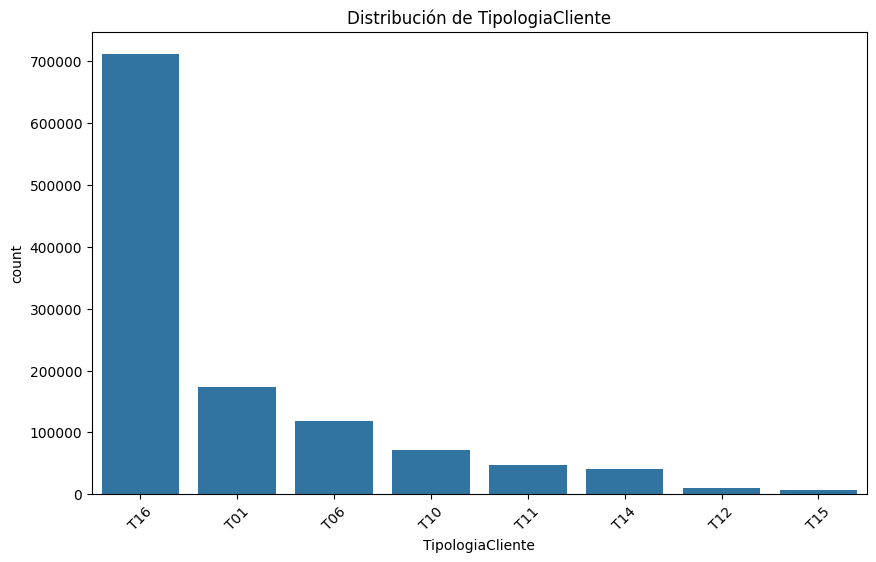

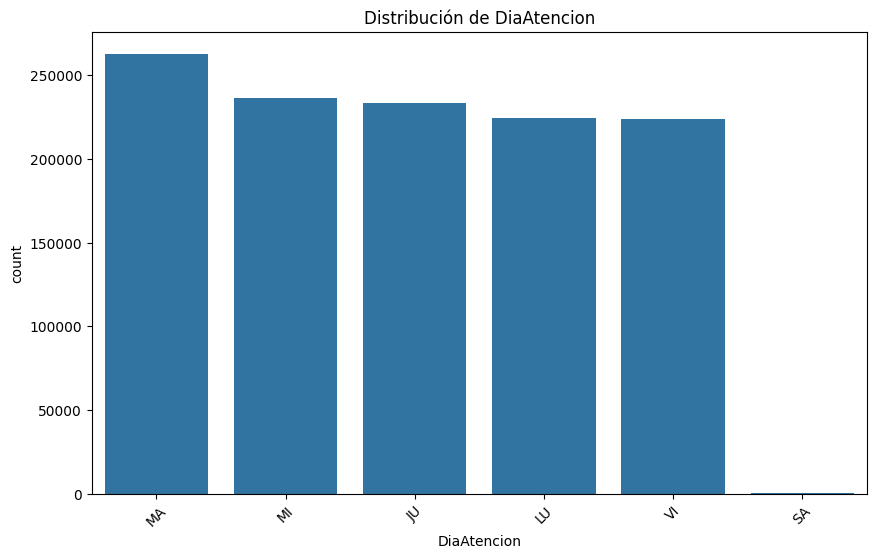

In [20]:
# Lista de columnas categóricas
categorical_columns_to_plot = ['CategoriaMarca', 'TipologiaCliente', 'DiaAtencion']

# Gráfico de barras para cada variable categórica
for column in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()


Correlación entre variables numéricas:


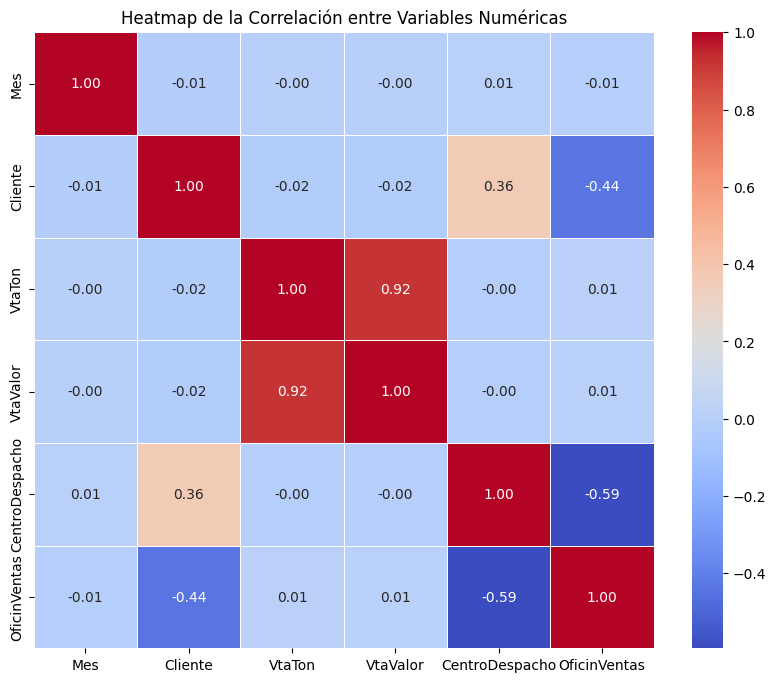

In [21]:
# Calcular la correlación solo entre columnas numéricas
print("\nCorrelación entre variables numéricas:")
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Correlación entre Variables Numéricas')
plt.show()

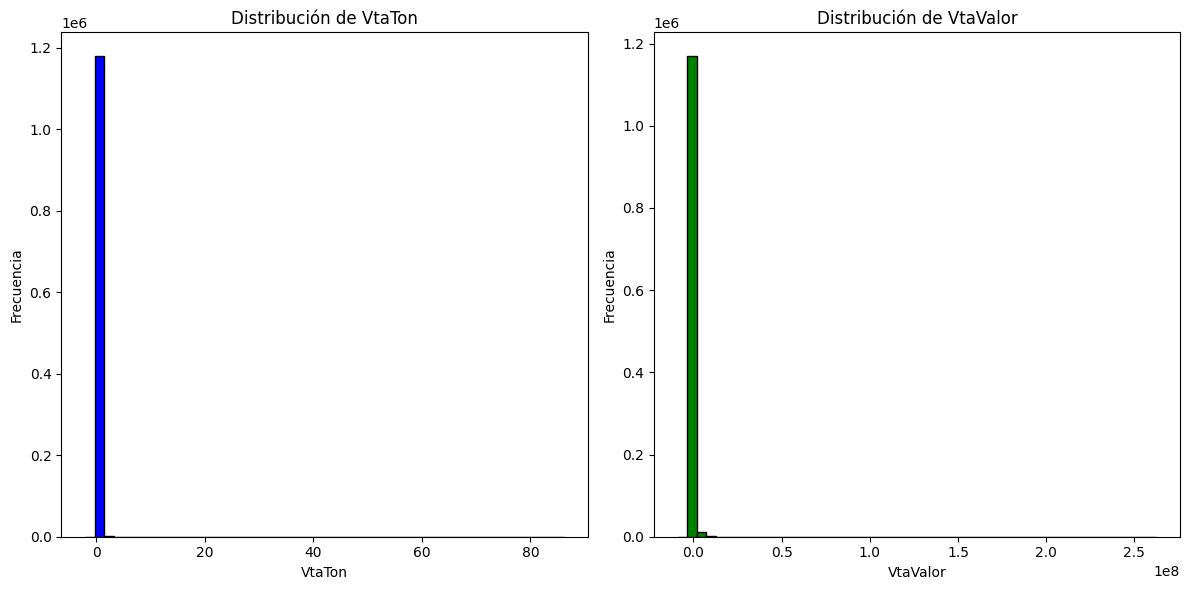

In [22]:
# Plotting the distribution of VtaTon and VtaValor
plt.figure(figsize=(12, 6))

# Distribution for VtaTon
plt.subplot(1, 2, 1)
plt.hist(df['VtaTon'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de VtaTon')
plt.xlabel('VtaTon')
plt.ylabel('Frecuencia')

# Distribution for VtaValor
plt.subplot(1, 2, 2)
plt.hist(df['VtaValor'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de VtaValor')
plt.xlabel('VtaValor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

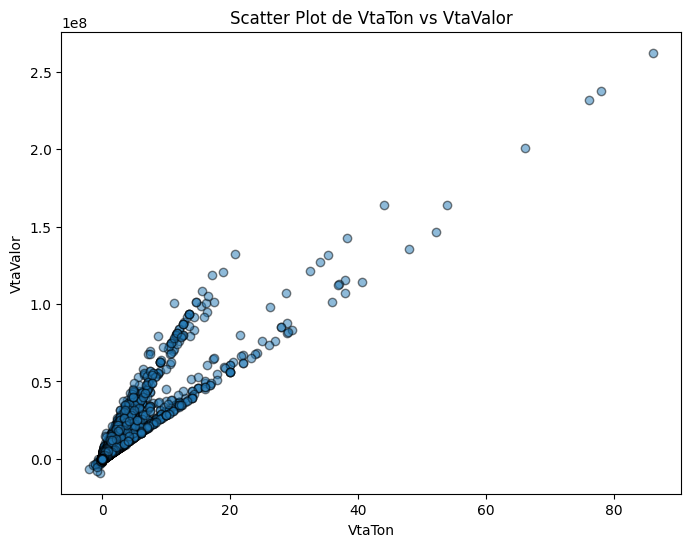

In [23]:
# Crear un scatter plot de VtaTon vs VtaValor
plt.figure(figsize=(8, 6))
plt.scatter(df['VtaTon'], df['VtaValor'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot de VtaTon vs VtaValor')
plt.xlabel('VtaTon')
plt.ylabel('VtaValor')
plt.show()

# **Preparación de datos**

In [24]:
# Agrupar los datos por 'Cliente' y 'SKU', sumando las ventas en toneladas (VtaTon)
df_agg = df.groupby(['Cliente', 'SKU']).agg({'VtaTon': 'sum'}).reset_index()

# Pivotar la tabla para crear la matriz de usuario-producto
matriz_usuario_producto = df_agg.pivot(index='Cliente', columns='SKU', values='VtaTon')

# Rellenar los valores faltantes con 0 (asumimos que los productos no comprados tienen valor 0)
matriz_usuario_producto = matriz_usuario_producto.fillna(0)

# Mostrar la matriz de usuario-producto
matriz_usuario_producto.head()


SKU,D500,D501,D503,D504,D505,D506,H1004,H1011,H1013,H1022,...,Q917,Q958,Q960,Q961,Q964,Q965,Q968,Q969,Q970,Q977
Cliente,,,,,,,,,,,,,,,,,,,,,
3001295,0.0018,0.00000,0.0000,0.0290,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0072,0.0000,0.0000,-0.0007,0.00000,0.0,-0.0003,0.0000,0.0000,0.000
3001302,0.0063,0.00465,0.0000,0.0145,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0058,0.0015,0.0056,0.0000,0.00378,0.0,0.0012,0.0000,0.0000,0.021
3001305,0.0015,0.00045,0.0097,0.0000,0.0,0.0,0.0,0.0,0.0,0.003,...,0.0000,0.0000,0.0000,0.0000,0.00000,0.0,0.0000,0.0000,0.0000,0.000
3001306,0.0000,0.00000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0768,0.0078,0.0098,0.0000,0.00000,0.0,0.0195,0.0207,0.0144,0.108
3001310,0.0087,0.00510,0.0194,0.0000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0048,0.0000,0.0000,0.0000,0.00000,0.0,0.0009,0.0018,0.0015,0.000


In [25]:
df_surprise = df_agg[df_agg['VtaTon'] >= 0]
df_surprise.head()

,Cliente,SKU,VtaTon
0,3001295,D500,0.0018
1,3001295,D504,0.0290
2,3001295,H1067,0.0680
3,3001295,H1121,0.0264
4,3001295,H700,2.1970


In [26]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357274 sha256=92e184022c18e121288c8234948fc7cc0dbc9c02b9d9148b0a4fca8c7fae856f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


# **Entrenamiento y validación del modelo**

In [27]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV, train_test_split
from surprise import Dataset, Reader
from surprise import accuracy

# Definir el rango de las calificaciones (VtaTon)
reader = Reader(rating_scale=(0, df_surprise['VtaTon'].max()))

# Cargar los datos en el formato de Surprise
data = Dataset.load_from_df(df_surprise[['Cliente', 'SKU', 'VtaTon']], reader)

# Dividir los datos en conjunto de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

# Parámetros para KNN con diferentes métricas de similitud en un enfoque basado en ítems
param_grid_knn_item = {
    'k': [20, 30, 40],
    'sim_options': {
        'name': ['msd', 'pearson'],  # Métricas de similitud
        'user_based': [False],  # False para un enfoque basado en ítems
        'min_support': [1]
    }
}

# Crear el GridSearchCV para KNN basado en ítems
gs_knn_item = GridSearchCV(KNNBasic, param_grid_knn_item, measures=['rmse'], cv=3)
gs_knn_item.fit(data)

# Obtener los mejores parámetros para KNN basado en ítems
print("Mejores parámetros para KNN basado en ítems: ", gs_knn_item.best_params['rmse'])

# Entrenar el modelo KNN basado en ítems con los mejores parámetros encontrados
best_knn_item_model = gs_knn_item.best_estimator['rmse']
best_knn_item_model.fit(trainset)

# Evaluar el rendimiento del modelo KNN basado en ítems en el conjunto de prueba
knn_item_predictions = best_knn_item_model.test(testset)
accuracy.rmse(knn_item_predictions)

# Obtener recomendaciones basadas en ítems para 10 clientes con el modelo KNN basado en ítems
clientes = df_surprise['Cliente'].unique()[:10]

for cliente in clientes:
    # Obtener todos los ítems (SKU) que no han sido calificados por el cliente
    productos = df_surprise['SKU'].unique()
    productos_calificados = [pred.iid for pred in knn_item_predictions if pred.uid == cliente]
    productos_no_calificados = [item for item in productos if item not in productos_calificados]

    # Hacer predicciones para los ítems no calificados
    predicciones_cliente_item = [best_knn_item_model.predict(cliente, item) for item in productos_no_calificados]

    # Ordenar las predicciones por la calificación estimada
    predicciones_cliente_item.sort(key=lambda x: x.est, reverse=True)

    # Mostrar las 5 mejores recomendaciones para el cliente
    print(f'Recomendaciones para el cliente {cliente} con KNN basado en ítems:')
    for pred in predicciones_cliente_item[:5]:
        print(f'Producto: {pred.iid}, Calificación estimada: {pred.est}')
    print("\n")


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarit